## Observations and Insights 

1) Capomulin and Ramicane are noticably better than placebo. The means and medians of these two are far lower than the others (around 40, compared to 50-55).

2) Capomulin seems to progressively lower tumour volume over time.

3) Tumour size is positively correlated with mouse weight; the larger the mouse, the larger the tumours they get.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
mouse_metadata.sort_values(by=["Mouse ID"])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
49,a203,Infubinol,Female,20,23
50,a251,Infubinol,Female,21,25
51,a262,Placebo,Female,17,29
52,a275,Ceftamin,Female,20,28
53,a366,Stelasyn,Female,16,29
...,...,...,...,...,...
245,z435,Propriva,Female,12,26
8,z578,Ramicane,Male,11,16
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results.sort_values(by=["Mouse ID"])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
113,a203,0,45.000000,0
389,a203,5,48.508468,0
1295,a203,25,56.793208,1
1675,a203,40,63.593490,2
1577,a203,35,61.931650,2
...,...,...,...,...
1143,z969,25,63.145652,2
1076,z969,20,57.898778,2
301,z969,5,49.332999,0
1529,z969,35,69.176246,4


In [4]:
# Combine the data into a single dataset
lush = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
lush

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
nummice = lush["Mouse ID"].nunique()
print(f"there were {nummice} mice in the experiment.")

there were 249 mice in the experiment.


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = lush.loc[lush.duplicated(subset=["Mouse ID", "Timepoint"], keep=False), :]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_metadata.loc[mouse_metadata["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_lush = lush.loc[lush["Mouse ID"] != "g989", :]
clean_lush

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
nummice = clean_lush["Mouse ID"].nunique()
print(f"There were {nummice} mice in the experiment, post-cleaning.")

There were 248 mice in the experiment, post-cleaning.


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the  tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = clean_lush.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = clean_lush.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_var = clean_lush.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_sigma = clean_lush.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = clean_lush.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


summary_df = pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Variance": tumor_var,
    "Standard Deviation": tumor_sigma,
    "SEM":tumor_sem
})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = clean_lush.groupby("Drug Regimen").agg(mean = ('Tumor Volume (mm3)', 'mean'), 
                                                    median = ('Tumor Volume (mm3)', 'median'),
                                                    var = ('Tumor Volume (mm3)', 'var'),
                                                    std = ('Tumor Volume (mm3)', 'std'),
                                                    sem = ('Tumor Volume (mm3)', 'sem')
                                                    ).round(2)
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [12]:
timepoint_totals = clean_lush.groupby(["Drug Regimen"]).sum()["Timepoint"]
timepoint_totals

Drug Regimen
Capomulin    4960
Ceftamin     3515
Infubinol    3235
Ketapril     3705
Naftisol     3650
Placebo      3380
Propriva     2525
Ramicane     4885
Stelasyn     3480
Zoniferol    3525
Name: Timepoint, dtype: int64

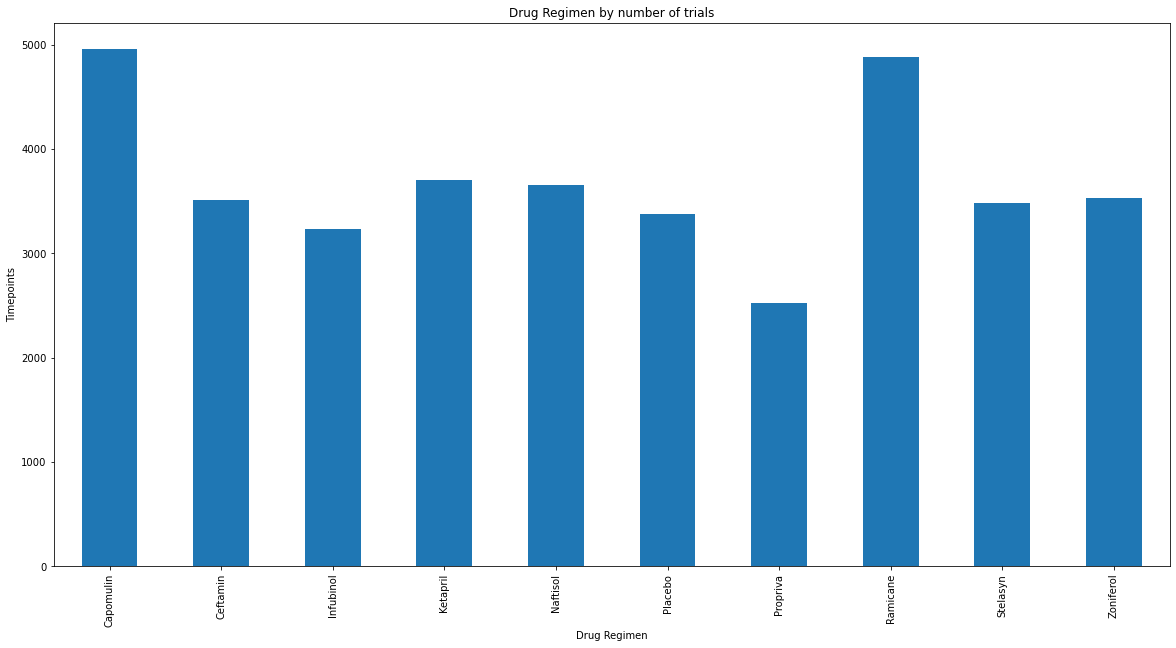

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_totals.plot(kind="bar", figsize=(20,10), ylabel="Timepoints")
plt.title("Drug Regimen by number of trials")
plt.show()
plt.tight_layout()


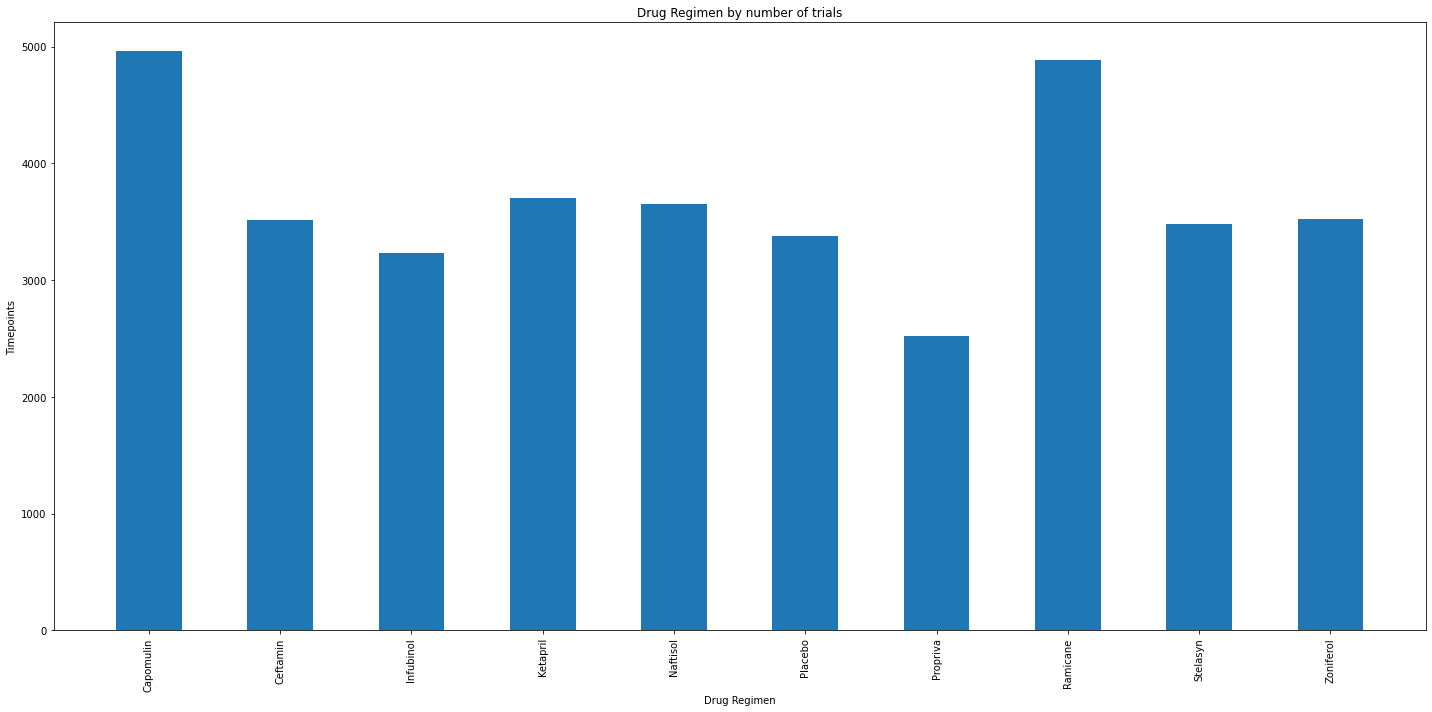

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_totals_index = timepoint_totals.reset_index()
timepoint_totals_index



# Set x axis and tick locations
x_axis = np.arange(len(timepoint_totals_index))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(x_axis, timepoint_totals_index["Timepoint"],width=0.5,  align="center")
plt.xticks(tick_locations, timepoint_totals_index["Drug Regimen"], rotation="vertical")

# Set x and y limits

# Set a Title and labels
plt.title("Drug Regimen by number of trials")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

# Save our graph and show the grap
plt.tight_layout()
#plt.savefig("../Images/avg_state_rain.png")
plt.show()

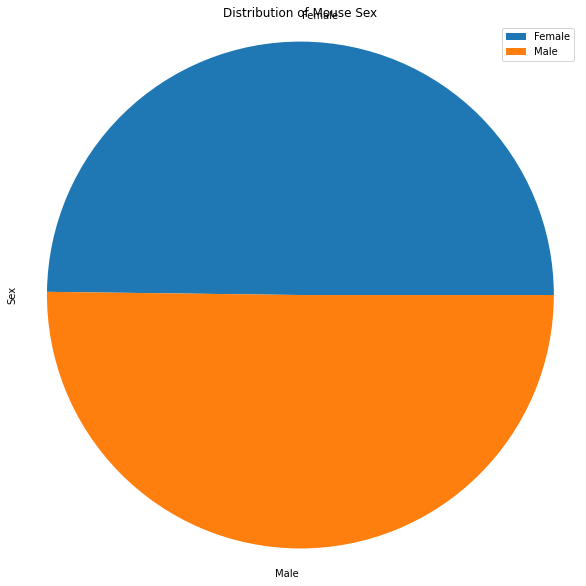

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_sex = mouse_metadata.groupby(["Sex"]).count()
mouse_sex

sexpie = mouse_sex.plot(kind="pie", y='Mouse ID', title=("Distribution of Mouse Sex"), figsize=(10, 10))
sexpie.set_ylabel("Sex")

plt.axis("equal")
plt.show()

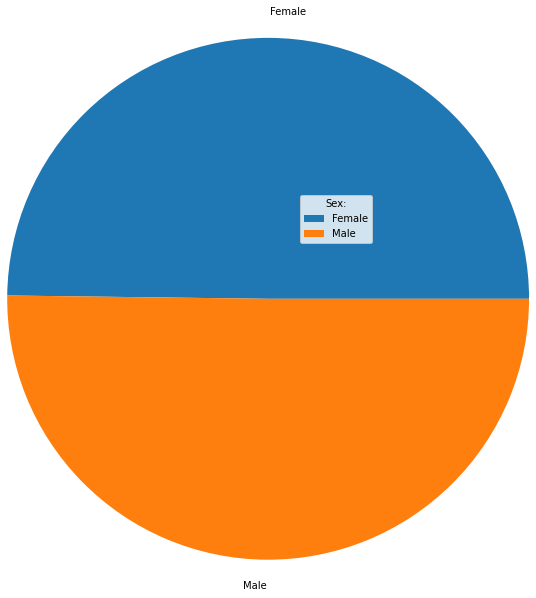

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex_index = mouse_sex.reset_index()

plt.pie(mouse_sex_index["Mouse ID"], labels=mouse_sex_index["Sex"], radius = 3)

plt.legend(title = "Sex:")

## Quartiles, Outliers and Boxplots

In [28]:
top_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments = []
for drug in top_drugs:
    drugDF = clean_lush.loc[((clean_lush["Drug Regimen"] == drug ))]
    drugDF = drugDF.groupby(["Mouse ID"], as_index=False).last()
    drugDF.sort_values(by="Tumor Volume (mm3)")
    treatments.append(drugDF) 


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = [capomulin, ramicane, infubinol, ceftamin]


# Create empty list to fill with tumor vol data (for plotting)
outliers = []
quartile_sum = pd.DataFrame({})
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


for drug in treatments:
    
    #instantiate q0->5
    quartiles = drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    median = quartiles[0.5]    
    upperq = quartiles[0.75]
    lowest = drug["Tumor Volume (mm3)"].min()
    highest = drug["Tumor Volume (mm3)"].max()
    
    iqr = upperq-lowerq
    
    #outlier check
    x = drug.loc[drug["Tumor Volume (mm3)"] < (lowerq - iqr*1.5)]
    if len(x) > 0:
        outliers.append(x["Mouse ID"])
        
#investigate a better way to do this...
    drugdict = {"drug": drug["Drug Regimen"][0], 
                "Q0": round(lowest, 1), 
                "Q1": round(lowerq, 1), 
                "Q2": round(median, 1), 
                "Q3": round(upperq, 1), 
                "Q4": round(highest, 1)}   
    quartile_sum = quartile_sum.append(drugdict, ignore_index=True)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # Determine outliers using upper and lower bounds
print(f"there are {len(outliers)} outliers in the data: {outliers}")
    # add subset 
    
#format nicely    
quartile_sum = quartile_sum.transpose()
quartile_sum.columns = quartile_sum.iloc[0] 
quartile_sum = quartile_sum[1:]
quartile_sum



there are 1 outliers in the data: [5    c326
Name: Mouse ID, dtype: object]


drug,Capomulin,Ramicane,Infubinol,Ceftamin
Q0,23.3,22.1,36.3,45.0
Q1,32.4,31.6,54.0,48.7
Q2,38.1,36.6,60.2,59.9
Q3,40.2,40.7,65.5,64.3
Q4,47.7,45.2,72.2,68.9


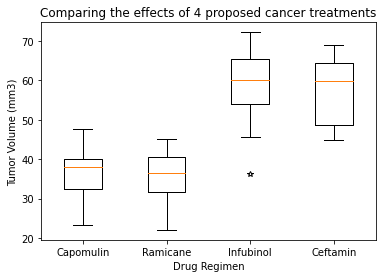

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = treatments[0]["Tumor Volume (mm3)"], \
        treatments[1]["Tumor Volume (mm3)"], \
        treatments[2]["Tumor Volume (mm3)"], \
        treatments[3]["Tumor Volume (mm3)"]
fig, ax = plt.subplots()
ax.set_title('Comparing the effects of 4 proposed cancer treatments')
ax.boxplot(data, labels = top_drugs, sym="*")

plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

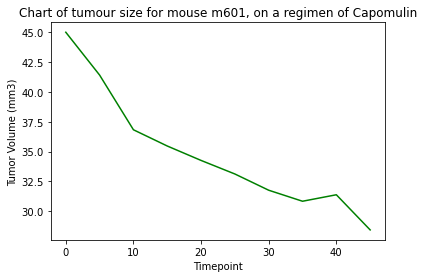

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#filter down clean_lush to just Capomulin
clean_lush = lush.loc[lush["Mouse ID"] != "g989", :]

line_data = clean_lush.loc[(clean_lush["Drug Regimen"] == "Capomulin")]

#filter that down to data for one random mouse
lucky_mouse = random.choice(line_data["Mouse ID"].unique())
line_data = line_data.loc[line_data["Mouse ID"] == lucky_mouse]
line_data

#present data as line graph
x = line_data["Timepoint"]
y = line_data["Tumor Volume (mm3)"]


mousegraph = plt.plot(x, y, color="green")

# Create a legend for our chart


plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Chart of tumour size for mouse {lucky_mouse}, on a regimen of Capomulin")
# Show the chart
plt.show()

In [32]:
#line graph for all Capomulin mice?

#line_data = clean_lush.loc[(clean_lush["Drug Regimen"] == "Capomulin")]
#colour = 31
#for mouse in line_data["Mouse ID"].unique():
#    line_data = line_data.loc[line_data["Mouse ID"] == mouse]
#    x = line_data["Timepoint"]
#    y = line_data["Tumor Volume (mm3)"]
#    mousegraph = plt.plot(x, y)
#    colour += 1
#    print(colour)

## Create a legend for our chart


#plt.xlabel("Timepoint")
#plt.ylabel("Tumor Volume (mm3)")
#plt.title(f"Chart of tumour size for mice on a regimen of Capomulin")
## Show the chart
#plt.show()

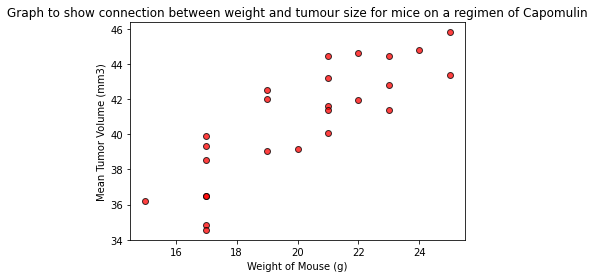

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_data = clean_lush.loc[(clean_lush["Drug Regimen"] == "Capomulin")]
scatter_data = scatter_data.groupby(["Mouse ID"]).agg({"Tumor Volume (mm3)": "mean",
                                                       "Weight (g)": "first"
                                                      })
scatter_data

x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values,  facecolors="red", edgecolors="black",
            alpha=0.75)


plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.title(f"Graph to show connection between weight and tumour size for mice on a regimen of Capomulin")
plt.show()

## Correlation and Regression

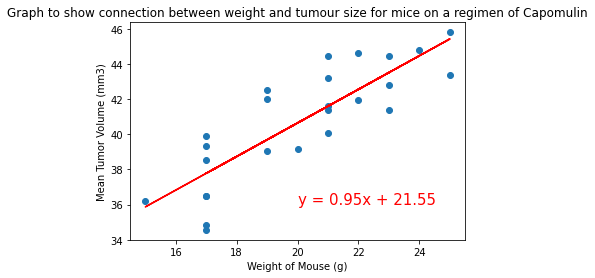

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 36),fontsize=15,color="red")

plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.title(f"Graph to show connection between weight and tumour size for mice on a regimen of Capomulin")

plt.show()